## Latente Dirichlet Allocation 

**À propos de LDA**

LDA est utilisé pour classer le texte d'un document dans un topic particulier. Il construit un topic par modèle de document et des mots par modèle de topic, modélisés comme des distributions Dirichlet.


- Chaque document consiste à un mélange de topics.

- Tous les topics consistent à un mélange de mots 


- Ainsi, chaque document est modélisé comme une distribution multinomiale de topics

- Et chaque topic est modélisé comme une distribution multinomiale de mots.


- LDA suppose que chaque morceau de texte que nous y introduisons contiendra des mots qui sont en quelque sorte liés.


- Par conséquent, il est crucial de choisir le bon corpus de données.


- Il suppose également que les documents sont produits à partir d'un mélange de topics. 


- Ces topics génèrent ensuite des mots en fonction de leur distribution de probabilité.


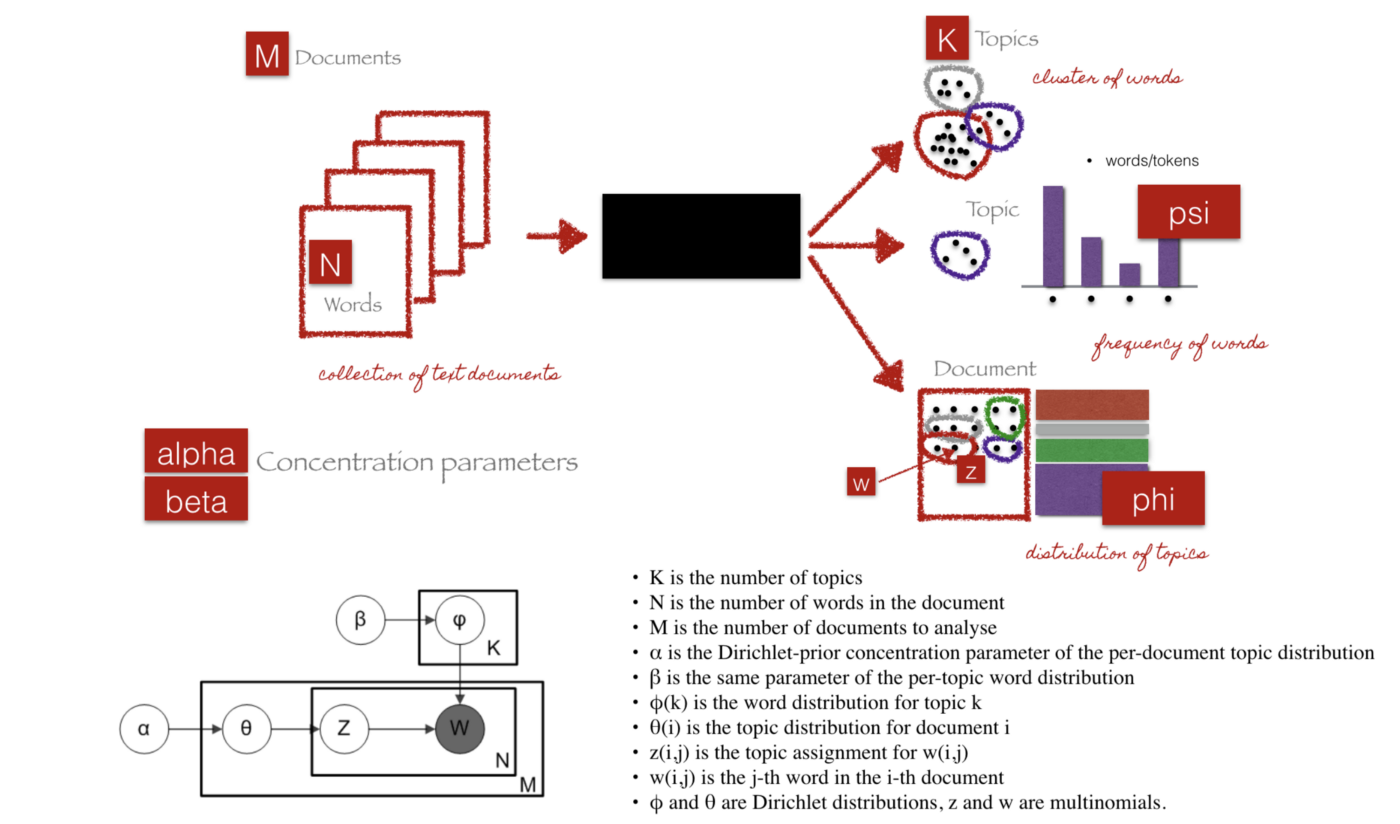













**Sources**:

- "Latent Dirichlet Allocation", David M. Blei, Andrew Y. Ng and Michael I. Jordan. Journal of Machine Learning Research 3 (2003) 993-1022(https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)


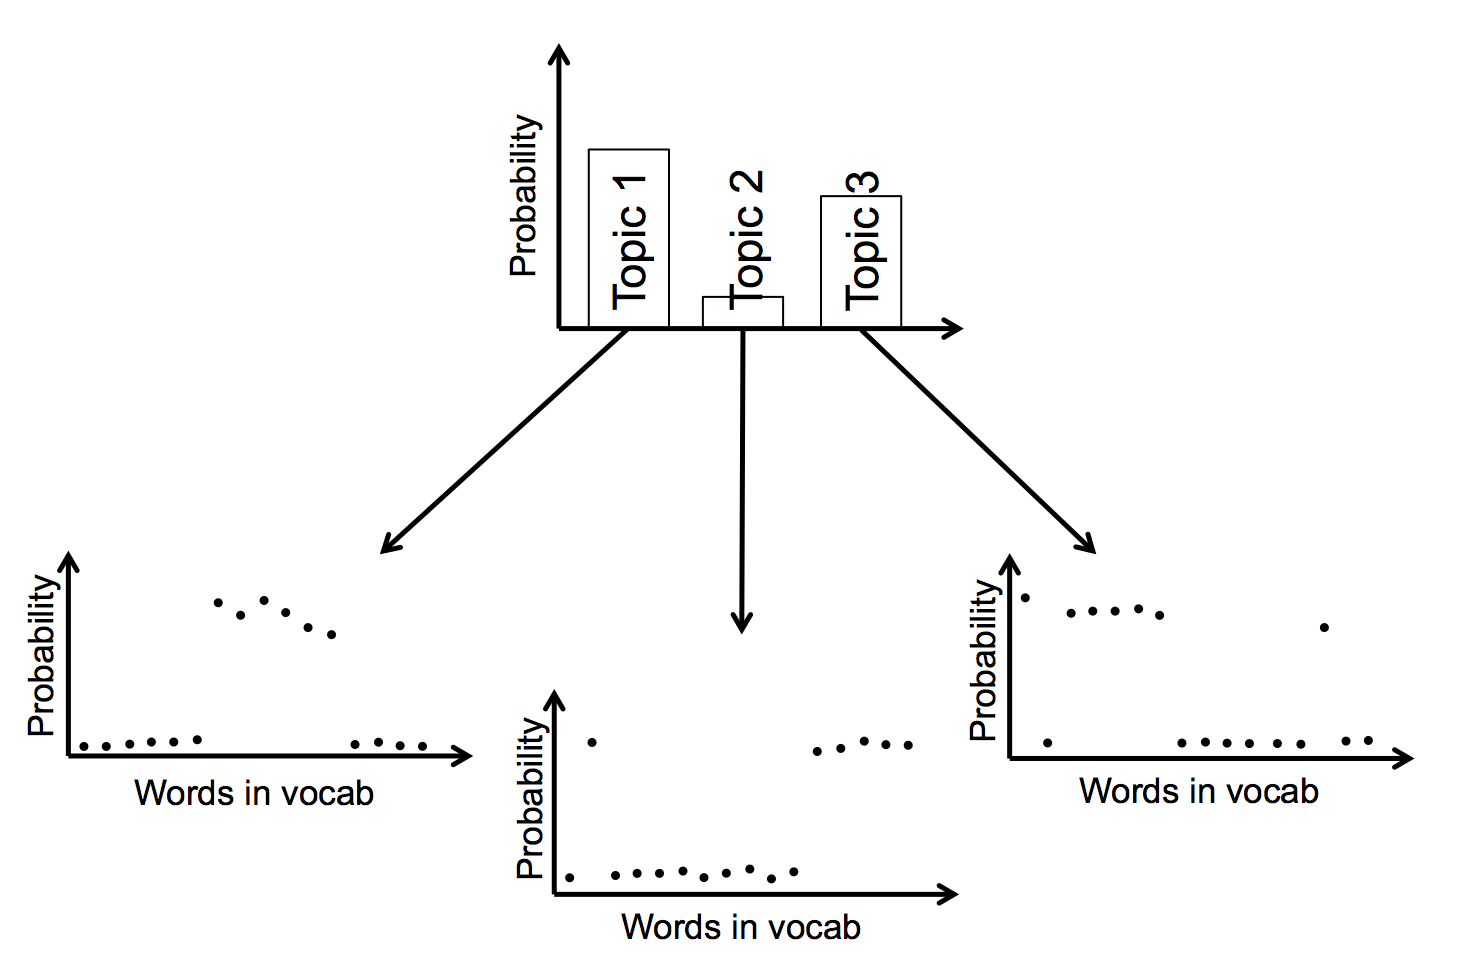

1. Chargement des données
2. Modélisation de phrases: bi-grammes et tri-grammes
3. Transformation des données: corpus et dictionnaire
4. Model de Base
5. Visualisez les résultats

### 1. Chargement des données

In [1]:
## for data manipulation
import numpy as np
import pandas as pd


## import the dataset
df=pd.read_csv("data_doc.csv")


### 2. Modélisation de phrases: bi-grammes et tri-grammes


- Les bigrammes sont deux mots qui apparaissent fréquemment ensemble dans le document. Les trigrammes sont 3 mots fréquemment utilisés.

- La fonction Phrases de Gensim peut construire et implémenter les bigrammes, trigrammes, quadgrammes et plus encore. 

In [2]:
from gensim.models import Phrases

tokens = df['tokens_all'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])
tokens[1]

"['aussi', 'tighten', 'grip', 'first', 'test', 'perth', 'day', 'three', 'australia', 'dec', 'pakistan', 'close', 'the', 'home', 'side', 'declar', 'their', 'second', 'inning', 'on', 'lead', 'of', 'and', 'pakistan', 'were', 'at', 'the', 'close', 'martyn', 'made', 'no', 'mistak', 'after', 'ricki', 'pont', 'wa', 'stump', 'for', 'and', 'justin', 'langer', 'bowl', 'by', 'abdul', 'razzaq', 'for', 'left', 'to', 'surviv', 'six', 'over', 'befor', 'the', 'close', 'pakistan', 'lost', 'imran', 'farhat', 'who', 'wa', 'lbw', 'to', 'glenn', 'mcgrath', 'for', 'one', 'pakistan', 'caus', 'wa', 'not', 'help', 'by', 'the', 'absenc', 'of', 'skipper', 'inzamamulhaq', 'and', 'paceman', 'shoaib', 'akhtar', 'for', 'most', 'of', 'the', 'afternoon', 'inzamam', 'stay', 'in', 'the', 'dress', 'room', 'suffer', 'from', 'stomach', 'upset', 'while', 'shoaib', 'hurt', 'hi', 'left', 'shoulder', 'while', 'tri', 'to', 'make', 'dive', 'save', 'in', 'the', 'field', 'he', 'had', 'taken', 'the', 'onli', 'wicket', 'to', 'fall',

### 3. Transformation des données: corpus et dictionnaire

- Les deux principales entrées du modèle de LDA sont le dictionnaire et le corpus. 

In [3]:
from gensim import corpora

# create Dictionary
dictionary_LDA = corpora.Dictionary([tokens])

# Term Document Frequency
corpus = [dictionary_LDA.doc2bow([tok]) for tok in tokens]

#View
print(corpus[:56])

[[(247, 1)], [(12, 1)], [(416, 1)], [(455, 1)], [(370, 1)], [(197, 1)], [(24, 1)], [(449, 1)], [(374, 1)], [(248, 1)], [(15, 1)], [(237, 1)], [(333, 1)], [(183, 1)], [(96, 1)], [(359, 1)], [(198, 1)], [(21, 1)], [(105, 1)], [(115, 1)], [(294, 1)], [(243, 1)], [(337, 1)], [(414, 1)], [(199, 1)], [(383, 1)], [(108, 1)], [(116, 1)], [(387, 1)], [(307, 1)], [(162, 1)], [(203, 1)], [(101, 1)], [(462, 1)], [(451, 1)], [(312, 1)], [(311, 1)], [(250, 1)], [(114, 1)], [(200, 1)], [(376, 1)], [(221, 1)], [(31, 1)], [(319, 1)], [(388, 1)], [(181, 1)], [(434, 1)], [(163, 1)], [(11, 1)], [(27, 1)], [(398, 1)], [(352, 1)], [(308, 1)], [(408, 1)], [(252, 1)], [(117, 1)]]


Gensim crée un identifiant unique pour chaque mot du document. Le corpus produit illustré ci-dessus est un mappage de **(word_id, word_frequency)**.

Dans notre cas l'id du mot es 247 et sa fréquence dans le document est 1. 


### 4. Model de Base


Nous avons tout ce qu'il faut pour former le modèle LDA de base. 

En plus du corpus et du dictionnaire, vous devez également fournir le nombre de sujets.

En dehors de cela, alpha et eta sont des hyperparamètres qui affectent la rareté des sujets. Selon la documentation Gensim, les deux valeurs par défaut sont 1.0 / num_topics avant (nous utiliserons la valeur par défaut pour le modèle de base).

- **chunksize** contrôle le nombre de documents traités à la fois.

- **passes** contrôle la fréquence à laquelle nous entraînons le modèle sur l'ensemble du corpus (défini sur 10)


In [6]:
from gensim import models
import gensim
import numpy as np
from pprint import pprint

np.random.seed(123)
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary_LDA,
                                       num_topics=num_topics)


# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"[\'hantuchova\', \'in\', \'dubai\', \'last\', \'eight\', '
  "'daniela', 'hantuchova', 'move', 'into', 'the', 'quarterfin', 'of', 'the', "
  "'dubai', 'open', 'after', 'beat', 'elen', 'likhotseva', 'of', 'russia', "
  "'and', 'now', 'face', 'serena', 'william', 'australian', 'open', "
  "'champion', 'william', 'surviv', 'an', 'earli', 'scare', 'to', 'beat', "
  "'russia', 'elena', 'bovina', 'world', 'number', 'one', 'lindsay', "
  "'davenport', 'and', 'anastasia', 'myskina', 'also', 'progress', "
  "'davenport', 'defeat', 'china', 'jie', 'zheng', 'while', 'french', 'open', "
  "'champion', 'myskina', 'sail', 'through', 'after', 'her', 'oppon', "
  "'marion', 'bartoli', 'retir', 'hurt', 'american', 'davenport', 'will', "
  "'now', 'face', 'fellow', 'former', 'wimbledon', 'champion', 'conchita', "
  "'martinez', 'of', 'spain', 'who', 'oust', 'seventhseed', 'nathali', "
  "'dechi', 'of', 'franc', 'myskina', 'will', 'face', 'eighthse', 'patti', "
  "'schnyder', 'from', 'swit

  "'sidestep', 'davi', 'cup', 'in', 'carlo', 'moya', 'ha', 'chosen', 'not', "
  "'to', 'help', 'spain', 'tri', 'and', 'defend', 'the', 'davi', 'cup', "
  "'crown', 'they', 'won', 'in', 'sevil', 'in', 'novemb', 'moya', 'led', "
  "'spain', 'to', 'victori', 'over', 'the', 'usa', 'but', 'want', 'to', "
  "'focu', 'on', 'the', 'grand', 'slam', 'in', 'although', 'insist', 'he', "
  "'will', 'return', 'to', 'the', 'davi', 'cup', 'in', 'after', 'two', 'year', "
  "'of', 'total', 'commit', 'with', 'the', 'davi', 'cup', 'team', 'have', "
  "'taken', 'thi', 'difficult', 'decis', 'to', 'concentr', 'on', 'the', "
  "'regular', 'circuit', 'said', 'moya', 'they', 'know', 'that', 'after', "
  "'thi', 'season', 'they', 'can', 'count', 'on', 'me', 'again', 'if', 'they', "
  "'so', 'wish', 'the', 'french', 'open', 'champion', 'is', 'determin', 'to', "
  "'make', 'an', 'impact', 'in', 'the', 'major', 'event', 'after', 'spend', "
  "'much', 'of', 'the', 'last', 'eight', 'year', 'in', 'the', 'top', 'at', "

In [7]:
#!pip install pyLDAvis
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary_LDA)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.114933 -0.015728       1        1  20.381169
1      0.053806 -0.099040       2        1  20.275853
4      0.050319  0.069995       3        1  20.272669
2      0.002015  0.058186       4        1  19.960261
3      0.008793 -0.013414       5        1  19.110048, topic_info=                                                  Term      Freq     Total  \
160  ['harbhajan', 'action', 'given', 'allclear', '...  1.000000  1.000000   
81   ['davenport', 'hit', 'out', 'at', 'wimbledon',...  1.000000  1.000000   
221  ['jayasuriya', 'set', 'to', 'join', 'somerset'...  1.000000  1.000000   
189  ['holm', 'start', 'with', 'gb', 'event', 'kell...  1.000000  1.000000   
99   ['edward', 'tip', 'idowu', 'for', 'euro', 'gol...  1.000000  1.000000   
..                                                 ...       ...       ...   
298  ['o', 'driscol', 'save', 'irish', 'blush', 'tw...  0.594240  1.010222   
6    ['an', 'irish', 'athlet', 'year', 'won', 'be',...  0.594232  1.010220   
235  ['kafer', 'resign', 'as', 'saracen', 'coach', ...  0.594127  1.010202   
306  ['pakistan', 'batsmen', 'make', 'edgi', 'start...  0.594031  1.010222   
206  ['injuri', 'sidelin', 'philippoussi', 'mark', ...  0.594015  1.010222   

    Category  logprob  loglift  
160  Default  30.0000  30.0000  
81   Default  29.0000  29.0000  
221  Default  28.0000  28.0000  
189  Default  27.0000  27.0000  
99   Default  26.0000  26.0000  
..       ...      ...      ...  
298   Topic5  -5.0225   1.1243  
6     Topic5  -5.0225   1.1243  
235   Topic5  -5.0227   1.1241  
306   Topic5  -5.0228   1.1240  
206   Topic5  -5.0229   1.1239  

[185 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
0         4  0.994006  ['a', 'year', 'to', 'rememb', 'for', 'irish', ...
1         3  0.986692  ['african', 'doubl', 'in', 'edinburgh', 'world...
3         1  0.990280  ['agassi', 'into', 'second', 'round', 'in', 'd...
6         5  0.989883  ['an', 'irish', 'athlet', 'year', 'won', 'be',...
9         3  0.986729  ['athen', 'memori', 'soar', 'abov', 'low', 'we...
...     ...       ...                                                ...
449       5  0.989876  ['wilson', 'back', 'in', 'kiwi', 'cricket', 's...
450       4  0.994003  ['windi', 'australia', 'tour', 'to', 'proceed'...
454       4  0.994008  ['worcest', 'sale', 'fri', 'sixway', 'friday',...
456       4  0.994017  ['world', 'xi', 'win', 'tsunami', 'match', 'ts...
461       1  0.990281  ['young', 'debut', 'cut', 'short', 'by', 'gine...

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])

### Analyse des résultats du modèle LDA



Maintenant que nous avons un modèle entraîné, visualisons les sujets d'interprétabilité. Pour ce faire, nous utiliserons un package de visualisation populaire, pyLDAvis , conçu pour aider de manière interactive avec:
Mieux comprendre et interpréter des sujets individuels, et
Mieux comprendre les relations entre les sujets.

Pour (1), vous pouvez sélectionner manuellement chaque sujet pour afficher ses termes les plus fréquents et / ou «pertinents», en utilisant différentes valeurs du paramètre λ. Cela peut vous aider lorsque vous essayez d'attribuer un nom ou une «signification» interprétable à chaque sujet.


Pour (2), l'exploration du diagramme de distance inter - sujets peut vous aider à découvrir comment les sujets sont liés les uns aux autres, y compris la structure potentielle de plus haut niveau entre les groupes de sujets.